# Ejercicio de Trabajo en Clases 05: CNN

<font color='red'>WARNING-1: No se aceptan soluciones que usen metodologías distintas a las vistas en clases.</font>

<font color='orange'>Está permitido usar los códigos de los ejemplos vistos en clases.</font>



En este problema de clasificación hay 3 clases:

* Clase 0: 'bikes' - personas con bicicleta

* Clase 1: 'noperson' - imágenes de la ciudad sin peatones ni bicicletas

* Clase 2: 'person' - peatones (sin bicicleta)

<font color='orange'>En este ejercicio realice un clasificador de estas tres clases usando una CNN.</font>

<font color='red'>La solución debe basarse en los ejemplos vistos en clases.</font>






# 0) Ingrese Nombre

<font color='red'>WARNING-2: CAMBIA EL NOMBRE DEL ARCHIVO ipynb INCLUYENDO TU RUT</font>

Ejemplo, si tu RUT es 12.345.678-9, el nombre de este archivo debe cambiarse de "E05_Tu_Rut.ipynb" a "E05_12345678-9.ipynb"



# 1) Carga de datos y librerías a utilizar

(2 puntos)

Incluya aquí todas las librerías a utilizar en este código. Cargue también aquí las funciones de `cnn_utils_01.py` proporcionadas en los ejemplos vistos en clases.

Los datos a utilizar se encuentran en `https://www.dropbox.com/s/p94odo87ekacd46/bikes3.zip` están dividos en tres carpetas: `train`, `val`  y `test`, y cada uno de ellos está subdividido en tres carpetas: `bikes`, `noperson` y `person`.




In [5]:
import torch
import torchvision
from   torchvision import transforms
from   torchvision.datasets import ImageFolder
from   torch.utils.data.dataloader import DataLoader
from   torch.utils.data import random_split
from   sklearn.metrics import confusion_matrix, accuracy_score
!wget https://www.dropbox.com/s/2q224dslxdiag7i/cnn_utils.py
from cnn_utils import *
print('cnn_utils module has been loaded')
!wget https://www.dropbox.com/s/p94odo87ekacd46/bikes3.zip
!unzip -qq bikes3.zip

--2024-10-07 00:46:41--  https://www.dropbox.com/s/2q224dslxdiag7i/cnn_utils.py
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/bxa3643c4ntgc3d4zjwj7/cnn_utils.py?rlkey=0a74yhz3rmfcfs58gkxzlkze8 [following]
--2024-10-07 00:46:41--  https://www.dropbox.com/scl/fi/bxa3643c4ntgc3d4zjwj7/cnn_utils.py?rlkey=0a74yhz3rmfcfs58gkxzlkze8
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc870c2682c269aaed050f9ea6cc.dl.dropboxusercontent.com/cd/0/inline/Cb-Nhmkk0OV6LyJwNRrMphaM1i1IlO_F-Gtr5KIzzH7hyKMhggkUJmQ4ZoVB5WJJKDhQaGqsOYyUanuNsb5fuHL_zHcS--gA45lMfdIqBHa1OIbVWV2G6D4DR7Lep4DGkTo/file# [following]
--2024-10-07 00:46:42--  https://uc870c2682c269aaed050f9ea6cc.dl.dropboxusercontent.com/cd/0/inline/Cb-Nhmkk0OV6LyJwNRr

# 2) Definición de conjuntos de Train/Val/Test

(1 punto)

- Defina los tres conjuntos usando la función `ImageFolder`
- Despliegue una de las imágenes de la base de datos
- Cargue las imagenes de train y validation en batches de 50
- Despliegue un batch (de 50 imagenes) en 5 filas de 10 imagenes cada una

## Defina los tres conjuntos usando la función ImageFolder

In [116]:
#train, test and validation data directory
train_dir = "bikes3/train"
test_dir  = "bikes3/test"
val_dir  = "bikes3/val"

#load the train, validation and test data
train_set = ImageFolder(train_dir,transform = transforms.Compose([
    transforms.Resize((64,64)),transforms.ToTensor()]))

test_set = ImageFolder(test_dir,transforms.Compose([
    transforms.Resize((64,64)),transforms.ToTensor()]))

val_set = ImageFolder(val_dir,transforms.Compose([
    transforms.Resize((64,64)),transforms.ToTensor()]))

img,_ = test_set[0]
print('Size image: '+ str(img.shape))
print('Train   Classes: ',train_set.classes)
print('Test   Classes: ',test_set.classes)
print('Val   Classes: ',val_set.classes)


Size image: torch.Size([3, 64, 64])
Train   Classes:  ['bikes', 'noperson', 'person']
Test   Classes:  ['bikes', 'noperson', 'person']
Val   Classes:  ['bikes', 'noperson', 'person']


## Despliegue una de las imágenes de la base de datos

Image: 5, Label : bikes


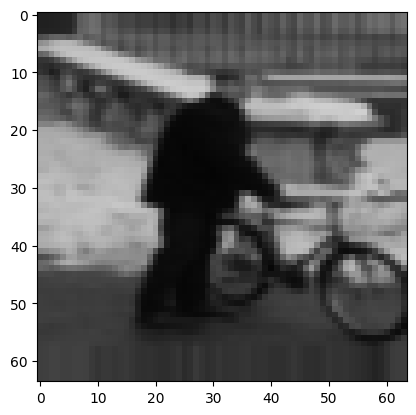

In [117]:
display_img(val_set,5)

## Cargue las imagenes de train y validation en batches de 50

In [159]:
batch_size = 50

#load the train and validation into batches.
train_dl = DataLoader(train_set, batch_size, shuffle = True, num_workers = 2, pin_memory = True)
val_dl = DataLoader(val_set, batch_size, num_workers = 4, pin_memory = True)

## Despliegue un batch (de 50 imagenes) en 5 filas de 10 imagenes cada una

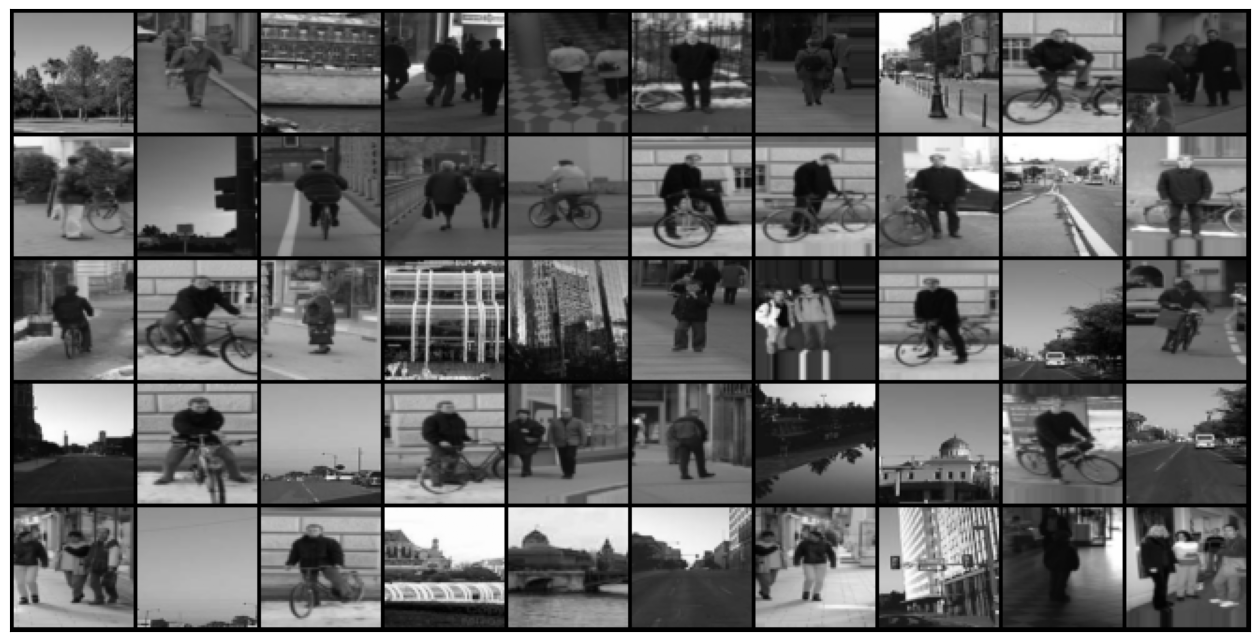

In [160]:
show_batch(train_dl,nrow=10)

# 3) Definición del modelo CNN

(4 puntos)

Defina la clase de la arquitectura del modelo CNN a utilizar.

<font color='red'>La arquitectura debe tener al principio 4 bloques tipo C y al final un cloque tipo F:

IMAGEN > BLOQUE C > BLOQUE C > BLOQUE C > BLOQUE C > BLOQUE F > SALIDA


BLOQUE C:
* `np.Conv2d`
* `np.ReLU`
* `np.Conv2d`
* `np.ReLU`
* `np.MaxPool2d`

Bloque F:
* `np.Flatten`
* `np.Linear`
* `np.Dropout`







In [161]:
# New architecture definition (equivalent to previous cell)
class CNN_Classification(ImageClassificationBase):
    def __init__(self):
        super().__init__()

        self.network = nn.Sequential(

            nn.Conv2d(in_channels=3, out_channels=4, kernel_size = 3, stride = 1, padding = 2),
            nn.ReLU(),
            nn.Conv2d(in_channels=4, out_channels=6, kernel_size = 3, stride = 1, padding = 2),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Conv2d(in_channels=6, out_channels=10, kernel_size = 3, stride = 1, padding = 2),
            nn.ReLU(),
            nn.Conv2d(in_channels=10, out_channels=18, kernel_size = 3, stride = 1, padding = 2),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Conv2d(in_channels=18, out_channels=24, kernel_size = 3, stride = 1, padding = 2),
            nn.ReLU(),
            nn.Conv2d(in_channels=24, out_channels=32, kernel_size = 3, stride = 1, padding = 2),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Conv2d(in_channels=32, out_channels=42, kernel_size = 3, stride = 1, padding = 2),
            nn.ReLU(),
            nn.Conv2d(in_channels=42, out_channels=54, kernel_size = 3, stride = 1, padding = 2),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Flatten(),
            nn.Linear(2646,3),
            nn.Dropout(0.25)
        )

    def forward(self, xb):
        return self.network(xb)


# 4) Entrenamiento

(5 puntos)

Entrene el modelo definido en el paso anterior

In [162]:
model =  CNN_Classification()
print(model)

CNN_Classification(
  (network): Sequential(
    (0): Conv2d(3, 4, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): Conv2d(4, 6, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(6, 10, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (6): ReLU()
    (7): Conv2d(10, 18, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(18, 24, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (11): ReLU()
    (12): Conv2d(24, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Conv2d(32, 42, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (16): ReLU()
    (17): Conv2d(42, 54, kernel_size=(3, 3), stride=(1, 1), padd

In [171]:
num_epochs = 50
opt_func   = torch.optim.Adam
lr         = 0.0005
history    = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch    Train-Loss   Val-Loss    Val-Acc   Best    Time [sec]
------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


    0      0.6629      0.6012      0.7300    ***       3.8 
    1      0.6500      0.5270      0.8800    ***       4.2 
    2      0.6058      0.5578      0.7600              2.9 
    3      0.5704      0.4964      0.8900    ***       2.9 
    4      0.5631      0.5719      0.7100              2.9 
    5      0.5583      0.5466      0.7100              4.4 
    6      0.5770      0.5558      0.7200              3.0 
    7      0.5367      0.4533      0.9300    ***       3.0 
    8      0.5346      0.5396      0.7000              3.1 
    9      0.5279      0.4253      0.8900              4.3 
   10      0.4985      0.5424      0.7100              2.9 
   11      0.4770      0.4240      0.8400              3.0 
   12      0.5285      0.4780      0.8300              3.0 
   13      0.4474      0.5052      0.8200              4.1 
   14      0.4633      0.3899      0.8500              3.1 
   15      0.4200      0.4389      0.8300              2.9 
   16      0.4248      0.3949      0.820

# 5) Gráficas de desempeño

(1 punto)

Despliegue las siguientes gráficas:

* Accuracy de validación vs. Epocas

* Loss de training y validación vs. Epocas

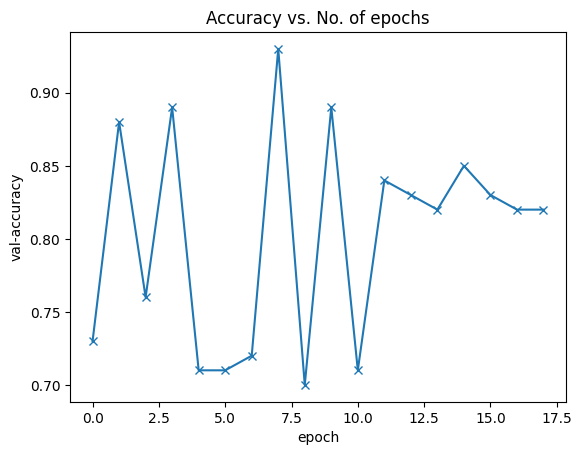

In [172]:
plot_accuracies(history)

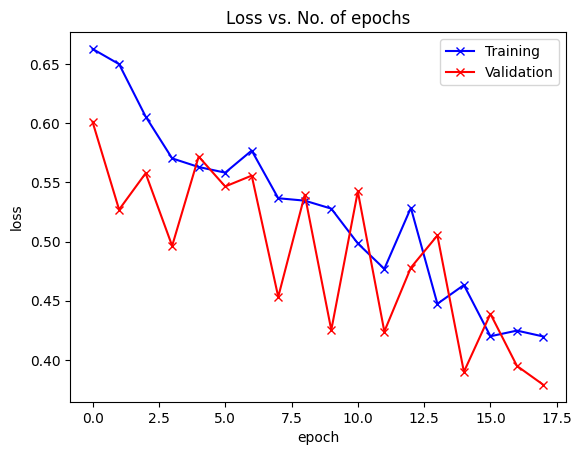

In [174]:
plot_losses(history)

In [175]:
model = load_model(CNN_Classification,'best_model.pt')

best_model.pt loaded.


/content/cnn_utils.py:177: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_file))


# 6) Evaluación del desempeño

Calcule la matrices de confusión y el accuracy para los conjuntos de training, validatio y testing usando el mejor modelo encontrado en el entrenamiento (`best_model.pt`).

(2 puntos)

In [176]:
ytest = get_labels(model,test_set)
ypred = get_prediction(model,test_set)

acc   = accuracy_score(ytest,ypred)
C     = confusion_matrix(ytest,ypred)

print('Performance on Testing subset:')
print('Accuracy:')
print(acc)
print(' ')
print('Confusion Matrix = ')
print(C)

Performance on Testing subset:
Accuracy:
0.8095238095238095
 
Confusion Matrix = 
[[63  0 21]
 [ 2 63 19]
 [ 6  0 78]]


Confusion Matrix:
[[63  0 21]
 [ 2 63 19]
 [ 6  0 78]]
Accuracy = 80.95


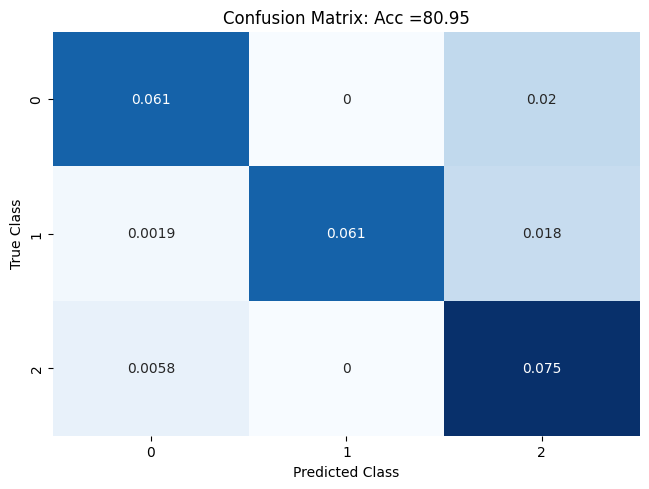

In [178]:
print_confusion(ytest,ypred,show_heatmap=1,Cnorm=1040)

In [179]:
C1,acc1 = performance(model,train_set,'Training')
C2,acc2 = performance(model,val_set,'Validation')
C3,acc3 = performance(model,test_set,'Testing')

Training Confusion Matrix = 
[[ 97   0  53]
 [  0 131  19]
 [ 16   3 131]]
 
Training Accuracy = 0.7978
 
Validation Confusion Matrix = 
[[20  0  0]
 [ 0 15  5]
 [ 0  2 18]]
 
Validation Accuracy = 0.8833
 
Testing Confusion Matrix = 
[[63  0 21]
 [ 2 63 19]
 [ 6  0 78]]
 
Testing Accuracy = 0.8095
 


# <font color='red'>SUBIR EJERCICIO DE FORMA INDIVIDUAL A CANVAS</font>

